In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Statistics/main/insurance%20(2).csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Plots to see the distribution of the continuous features individually

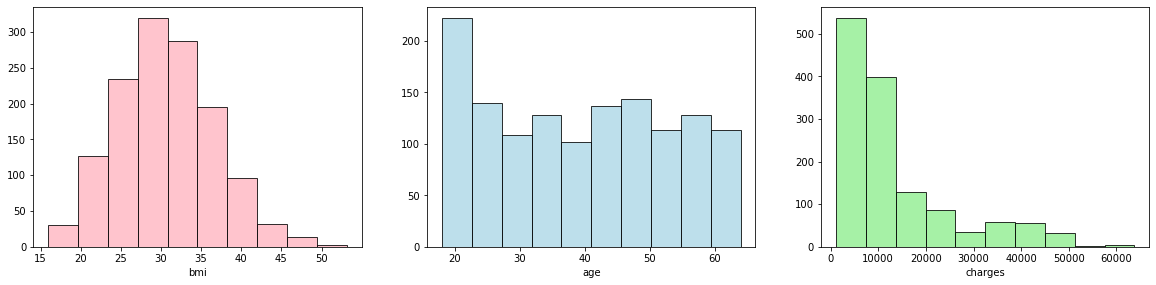

In [5]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightpink', edgecolor = 'black', alpha = 0.8)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.8)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightgreen', edgecolor = 'black', alpha = 0.8)
plt.xlabel('charges')

plt.show()

## - bmi looks quiet normally distributed
## - Age seems be be distributed quiet uniformly
## - As seen in the previous step, charges are highly skewed

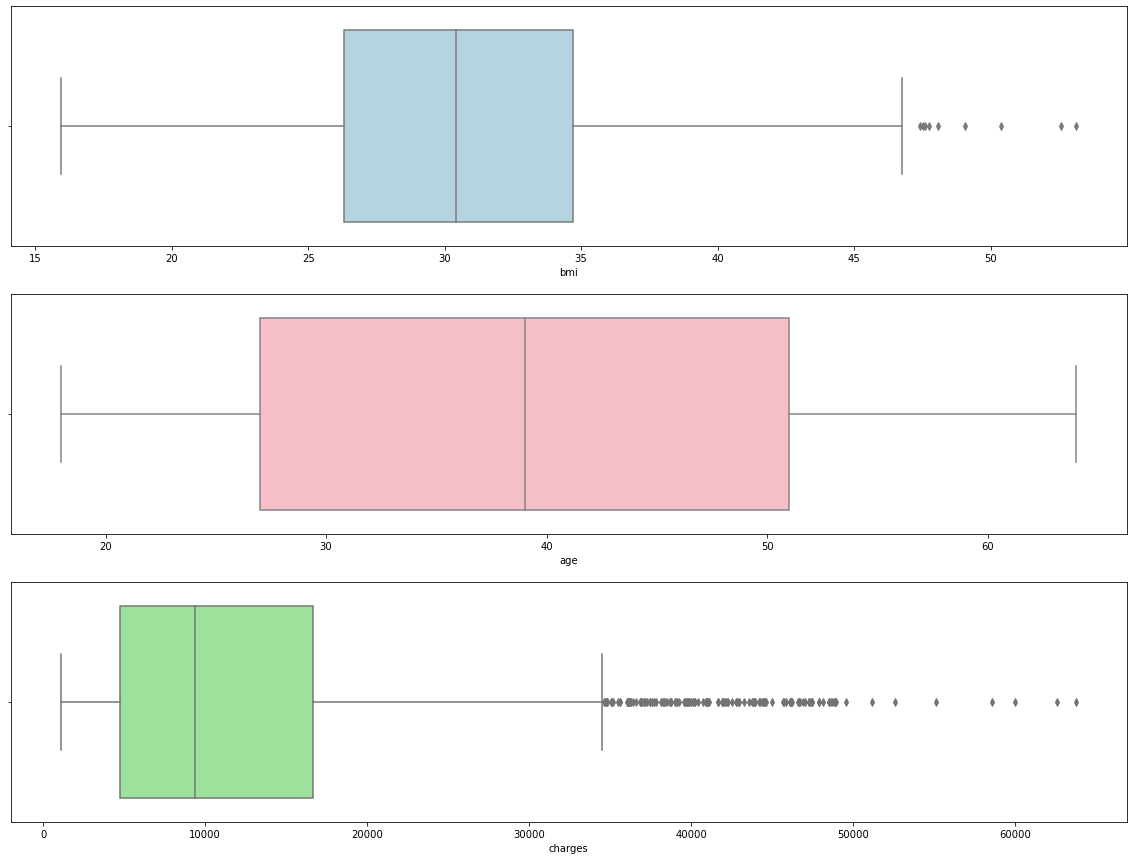

In [6]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightpink')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightgreen')

plt.show()

## - bmi has a few extreme values
## - charges as it is highly skewed, there are quiet a lot of extreme values

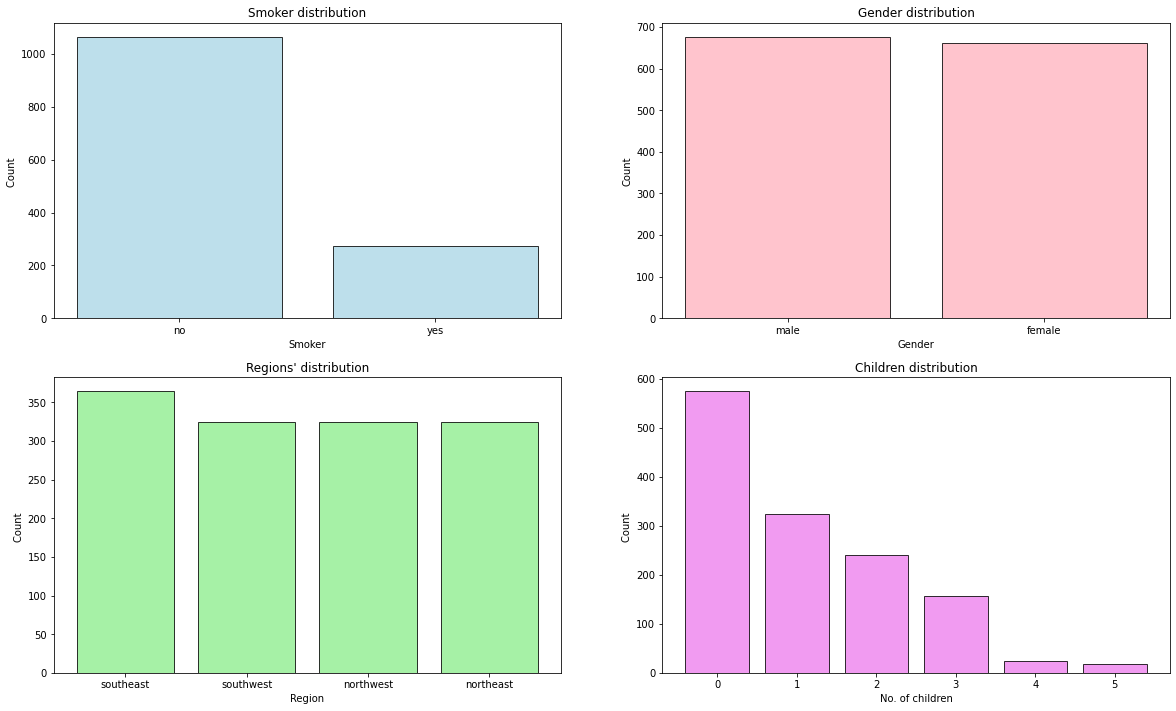

In [7]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightpink',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightgreen',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'violet',edgecolor = 'black',alpha = 0.8)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()



# Hypothesis Testing

## Basic EDA
### Find the shape of the data,data type of individual columns
### Check the presence of missing values
### Descriptive stats of numerical columns
### Find the distribution of numerical columns and the asssociated skeweness and presence of outliers
### Distribution of categorical columns

In [8]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## Do charges of people differ significantly among different genders

C:\Users\Atif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


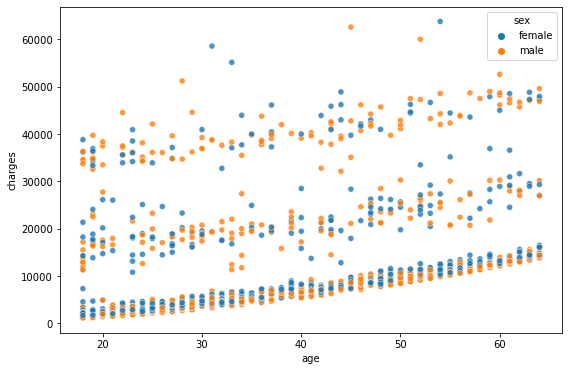

In [9]:
#Scatter plot to look for visual evidence of dependency between attributes gender and charges accross different ages
plt.figure(figsize=(9,6))
sns.scatterplot(df.age, df.charges, hue=df.sex, alpha=0.8)
plt.show()

## Visually the difference between charges of males and charges of females is not apparent

In [10]:
# T-test to check dependency of smoking on charges
Ho = "Charges of male and female are same"   # Stating the Null Hypothesis
Ha = "Charges of male and female are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].charges)  # Selecting charges corresponding to males as an array
y = np.array(df[df.sex == 'female'].charges) # Selecting charges corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of male and female are not the same as the p_value (0.03613272100592976) < 0.05


## Does bmi of males differ significantly from that of females?

In [11]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

C:\Users\Atif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


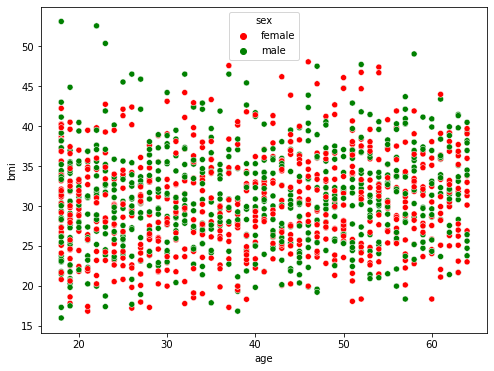

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.bmi,hue=df.sex,palette= ['red','green'] )
plt.show()


In [13]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


# Do charges of people who smoke differ significantly from the people who don't?

C:\Users\Atif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


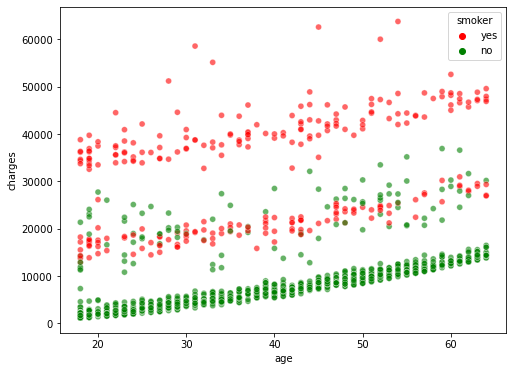

In [14]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

## - Visually the difference between charges of smokers and charges of non-smokers is apparent

In [15]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05
